# <font color='blue'><center>Breast Cancer</font>    

**Objective**

- Model to predict benign or malignant tumors using Kaggle data.

- Comparing the machine learning algorithm such as random forest classifier, the support vector machine, and the K-neighbors classifier for best prediction.

**Learning**  

- Feature Engineering 
- Exploratory Data Analysis
- Machine Learning Algorithms

In [41]:
#Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Used to plot interactive graph. 
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm #to support vector machine

#to check the error and accuracy of the model
from sklearn import metrics

#ignore warning 
import warnings
warnings.filterwarnings('ignore')

import missingno as msno #null data를 쉽게 채워 주는 것

In [42]:
data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [43]:
data.shape

(569, 33)

<AxesSubplot:>

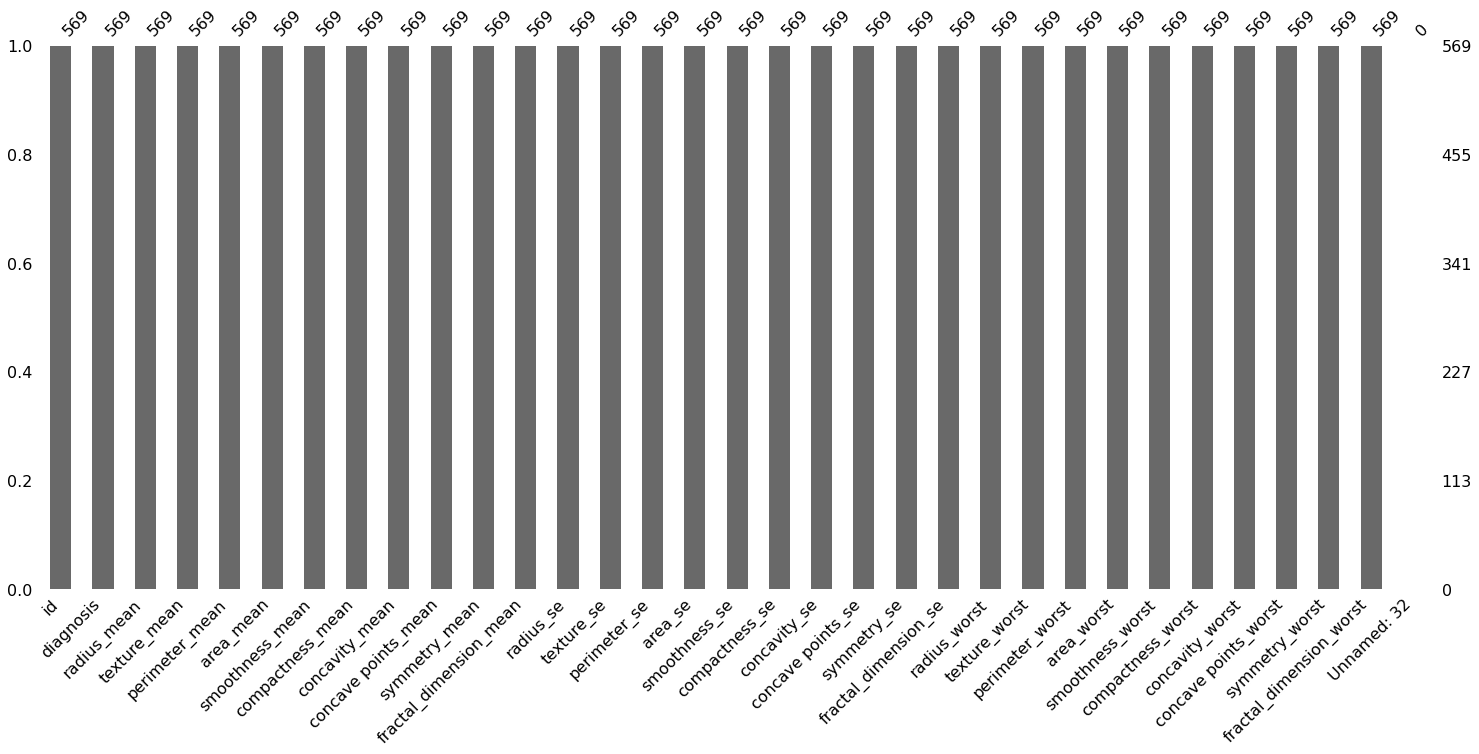

In [44]:
#Checking the missing values

data.isnull().sum()
msno.bar(data)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### What can be traced from data?

- diagnosis tells us whether its (M = malignant, B = benign)
- 3-32 contains real-value features, which enables us to build the model
- Our data doesno't contain any null.

Changes

- Column 33 or Unanames:32 seems like an impracticable column. Droping it
- The ID column doesn't equip any information. Droping it

In [46]:
#Droping Data

data.drop(['Unnamed: 32','id'], axis=1, inplace = True)


#Tracking the changes 
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Number of Benign:  357
Number of Malignant:  212


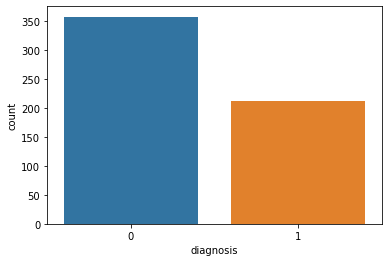

In [73]:
#EDA to get the assumption for M and B

sns.countplot(data['diagnosis'], label ='count')

B,M = data.diagnosis.value_counts() #y = data.diagnosis

print('Number of Benign: ', B)
print('Number of Malignant: ', M)

In [49]:
data.diagnosis.replace({"M":1,"B":0},inplace=True)
data.diagnosis.unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Correlation Map')

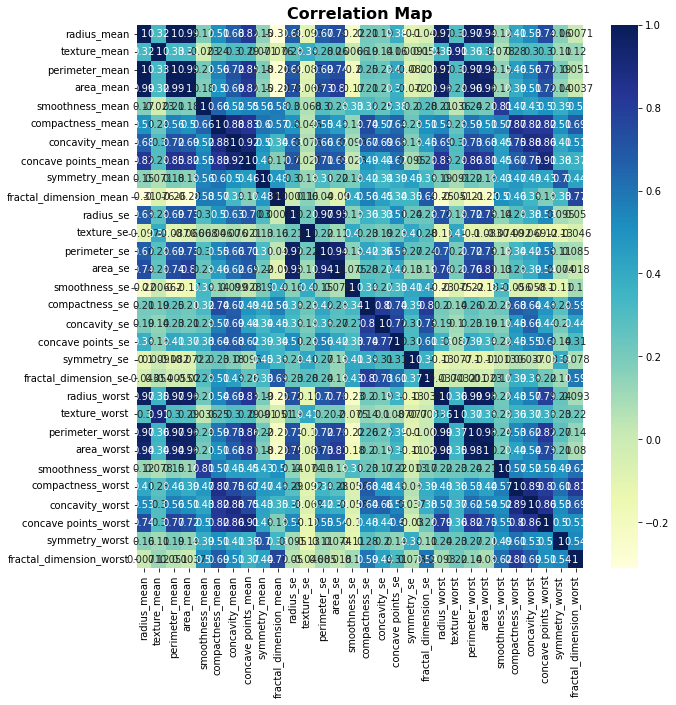

In [75]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [52]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation with target'}>

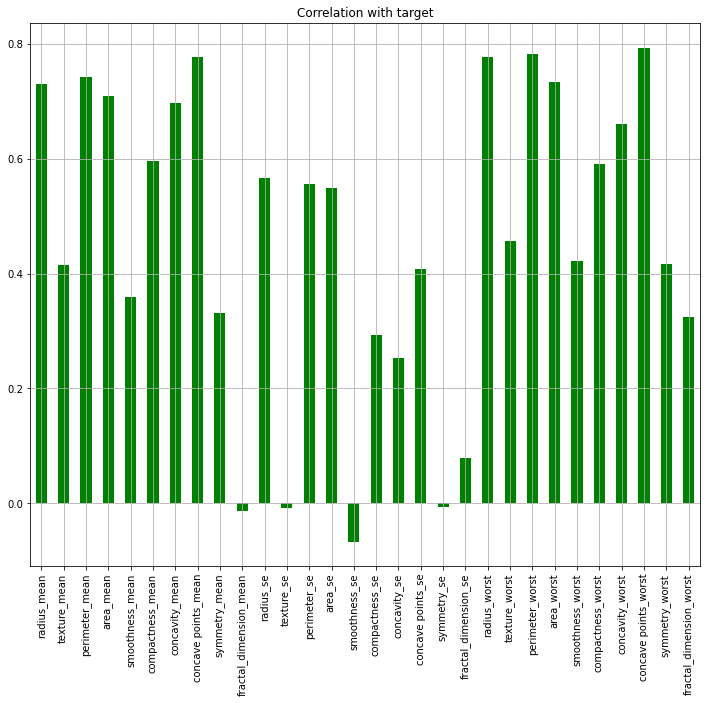

In [54]:
data.drop('diagnosis', axis=1).corrwith(data.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green")

In [58]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=data["diagnosis"]
X=data.drop(["diagnosis"],axis=1)
columns= data.columns.tolist()

In [59]:
columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [60]:
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1])

In [61]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

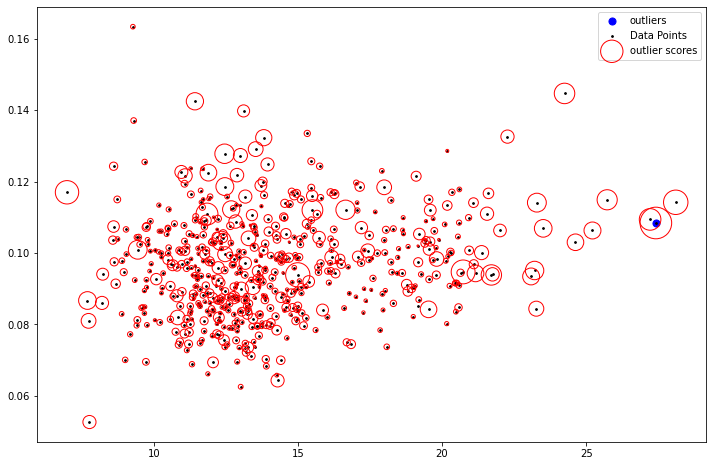

In [62]:
plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,0],X.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend()